# Performance/verification of a test

Import packages

In [1]:
import mallows_kendall as mk
import numpy as np
import itertools as it
import scipy as sp
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy.stats import rankdata
from scipy.stats import norm

### The C++ load and verification part

Compile C++ codes if necessary

In [2]:
# Compilation
#import os
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -fPIC  -Wall -g -O2  -c rankDepth.cpp -o rankDepth.o')
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -o rankDepth.so rankDepth.o')
# Restart the kernel after this line

Import (and test) the dynamic library

In [3]:
# Import and Test 1
from ctypes import *
cdll.LoadLibrary('rankDepth.so')
libc = CDLL('rankDepth.so')
libc.testFunc()

43

In [4]:
# Test 2
val = np.array([5.1])
obj = np.array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1])
n = 10
outp = np.array([1.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
res2 = libc.testFuncCmp(c_void_p(val.ctypes.data),
                       c_void_p(obj.ctypes.data),
                       c_int(n),
                       c_void_p(outp.ctypes.data))
print(res2)
print(outp)

0
[  1.1   0.    0.    0.    0.    0.    0.    0.    0.  142. ]


Depth-calculating Python function

In [5]:
def qrdepth(objects, data):
    '''
    The function to calculate the qr-depths
    '''
    depths = np.zeros(objects.shape[0])
    for i in range(objects.shape[0]):
        for j in range(data.shape[0]):
            depths[i] += (mk.max_dist(objects.shape[1]) - mk.distance(objects[i,:], data[j,:])) / mk.max_dist(objects.shape[1])
        depths[i] /= data.shape[0]
    return depths

### Mallows model 2

In [6]:
# Model 2: Mallows-Kendal scale difference
def MallowsDiff2(n = 10, m1 = 550, m2 = 50, diff = 1):
    theta1 = 1
    theta2 = diff
    cons1 = np.random.permutation(n)
    empDist1 = mk.sample(m = m1, n = n, theta = theta1, phi = None, s0 = cons1)
    empDist2 = mk.sample(m = m2, n = n, theta = theta2, phi = None, s0 = cons1)
    return empDist1, empDist2

Testing for the Kendall-Mallows model

In [7]:
np.random.seed(1)
empDist1, empDist2 = MallowsDiff2(10, 550, 50, 3)
print(empDist1.shape)
print(empDist2.shape)

(550, 10)
(50, 10)


In [8]:
np.array(list(range(11))) / 10 + 1

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

### Main loop

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
Scale value equals 1.0
Iteration 0
Plotting DD-plot
Performing the test
Calculating the p-value
2508.0
0.4533527891309418
Iteration 1
Plotting DD-plot
Performing the test
Calculating the p-value
2449.0
0.3001635059741667
Iteration 2
Plotting DD-plot
Performing the test
Calculating the p-value
2486.5
0.39534602133525387
Iteration 3
Plotting DD-plot
Performing the test
Calculating the p-value
2570.0
0.37819611098323314
Iteration 4
Plotting DD-plot
Performing the test
Calculating the p-value
2355.0
0.12060869021595205
Iteration 5
Plotting DD-plot
Performing the test
Calculating the p-value
2764.5
0.04936215539623612
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
2495.0
0.41807732821092153
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
2565.5
0.3900457850249296
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
2438.5
0.27548226610362675
Iteration 9
Plotting DD-plot
Perfo

Performing the test
Calculating the p-value
2400.0
0.19441874875738413
Iteration 82
Plotting DD-plot
Performing the test
Calculating the p-value
2272.0
0.04056765162027301
Iteration 83
Plotting DD-plot
Performing the test
Calculating the p-value
2627.5
0.23990240460084722
Iteration 84
Plotting DD-plot
Performing the test
Calculating the p-value
2609.0
0.2812673038334683
Iteration 85
Plotting DD-plot
Performing the test
Calculating the p-value
2480.5
0.37950732512632696
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
2364.5
0.13426414716290125
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
2579.0
0.3548473035032652
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
2611.5
0.2754822661036267
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
2538.5
0.4629253383742483
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
2640.5
0.21294738152266257
Iteration 91
Plotting DD

Calculating the p-value
2199.0
0.012307707482087574
Iteration 63
Plotting DD-plot
Performing the test
Calculating the p-value
2337.5
0.09807623778696634
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
2355.5
0.12130207197869275
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
2619.0
0.25848630864777744
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
2284.0
0.048315506178971936
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
2454.5
0.31347851315341435
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
2292.0
0.05410839416965705
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
2424.5
0.24420846749115016
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
2296.0
0.0572041920545633
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
2180.0
0.008694734218633595
Iteration 72
Plotting DD-plot
Performi

Performing the test
Calculating the p-value
2392.0
0.17960327535405674
Iteration 44
Plotting DD-plot
Performing the test
Calculating the p-value
2361.0
0.12911459462001845
Iteration 45
Plotting DD-plot
Performing the test
Calculating the p-value
2209.0
0.014686383997046451
Iteration 46
Plotting DD-plot
Performing the test
Calculating the p-value
2249.0
0.02854022401217319
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
1950.0
3.6860401525304375e-05
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
2436.5
0.2708967702095735
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
2123.0
0.002791514323400737
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
2125.5
0.002942859612686273
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
2207.0
0.014181281311271233
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
2392.5
0.18050791878256
Iteration 53
Plot

Performing the test
Calculating the p-value
2083.5
0.0011687452455493535
Iteration 25
Plotting DD-plot
Performing the test
Calculating the p-value
2131.0
0.0033021494180684517
Iteration 26
Plotting DD-plot
Performing the test
Calculating the p-value
2076.5
0.0009944721519819703
Iteration 27
Plotting DD-plot
Performing the test
Calculating the p-value
2252.5
0.030151894374929995
Iteration 28
Plotting DD-plot
Performing the test
Calculating the p-value
1835.5
1.000670738306424e-06
Iteration 29
Plotting DD-plot
Performing the test
Calculating the p-value
2066.5
0.0007866381253337244
Iteration 30
Plotting DD-plot
Performing the test
Calculating the p-value
2121.5
0.0027041139149610407
Iteration 31
Plotting DD-plot
Performing the test
Calculating the p-value
2107.5
0.0019999489055594175
Iteration 32
Plotting DD-plot
Performing the test
Calculating the p-value
2051.0
0.0005421824158099218
Iteration 33
Plotting DD-plot
Performing the test
Calculating the p-value
2089.5
0.0013399222976527739
I

Performing the test
Calculating the p-value
1735.5
2.6243797799880964e-08
Iteration 5
Plotting DD-plot
Performing the test
Calculating the p-value
1817.5
5.375276846376461e-07
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
2008.0
0.00018254998398753834
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
1980.0
8.593598151024501e-05
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
2044.0
0.00045669783507270906
Iteration 9
Plotting DD-plot
Performing the test
Calculating the p-value
2255.5
0.03159271207782684
Iteration 10
Plotting DD-plot
Performing the test
Calculating the p-value
2346.0
0.10860261515880587
Iteration 11
Plotting DD-plot
Performing the test
Calculating the p-value
1719.5
1.4042661075413371e-08
Iteration 12
Plotting DD-plot
Performing the test
Calculating the p-value
1830.0
8.289139381531985e-07
Iteration 13
Plotting DD-plot
Performing the test
Calculating the p-value
1843.5
1.3127185366011565e-06
Iter

Performing the test
Calculating the p-value
1997.0
0.0001363524333984072
Iteration 85
Plotting DD-plot
Performing the test
Calculating the p-value
1899.0
7.960976517441895e-06
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
1624.0
2.6268718898345153e-10
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
1849.5
1.6060031887501841e-06
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
1906.0
9.893780980195504e-06
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
2130.0
0.003234026738078926
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
2025.5
0.000287157556764023
Iteration 91
Plotting DD-plot
Performing the test
Calculating the p-value
1877.0
3.962589051066709e-06
Iteration 92
Plotting DD-plot
Performing the test
Calculating the p-value
1816.0
5.100567890848162e-07
Iteration 93
Plotting DD-plot
Performing the test
Calculating the p-value
2097.5
0.0016038057833645287


Calculating the p-value
1839.5
1.1465436792362312e-06
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
1767.5
8.846771849867428e-08
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
1870.5
3.2108820581498384e-06
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
1793.0
2.2525207401113908e-07
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
2087.0
0.0012659902793468881
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
1839.0
1.1272509065257025e-06
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
2086.0
0.0012374768542447942
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
1807.5
3.7815620879713196e-07
Iteration 71
Plotting DD-plot
Performing the test
Calculating the p-value
1819.0
5.664196139872021e-07
Iteration 72
Plotting DD-plot
Performing the test
Calculating the p-value
1784.0
1.6251746658217966e-07
Iteration 73
P

Performing the test
Calculating the p-value
1776.5
1.2345897692209427e-07
Iteration 44
Plotting DD-plot
Performing the test
Calculating the p-value
1800.5
2.948311876910863e-07
Iteration 45
Plotting DD-plot
Performing the test
Calculating the p-value
1792.0
2.1726843444623776e-07
Iteration 46
Plotting DD-plot
Performing the test
Calculating the p-value
1785.5
1.7164872256405631e-07
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
1816.5
5.190600671020294e-07
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
1796.0
2.509374289857716e-07
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
1841.5
1.2269331565632943e-06
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
1752.5
5.034454598101387e-08
Iteration 51
Plotting DD-plot
Performing the test
Calculating the p-value
1750.0
4.5783495000099986e-08
Iteration 52
Plotting DD-plot
Performing the test
Calculating the p-value
1738.0
2.890658218175864

Calculating the p-value
1819.0
5.664196139872021e-07
Iteration 23
Plotting DD-plot
Performing the test
Calculating the p-value
1675.0
2.3178659361025335e-09
Iteration 24
Plotting DD-plot
Performing the test
Calculating the p-value
1592.0
6.299524825303154e-11
Iteration 25
Plotting DD-plot
Performing the test
Calculating the p-value
1529.5
3.376241416317229e-12
Iteration 26
Plotting DD-plot
Performing the test
Calculating the p-value
1742.0
3.372004825452875e-08
Iteration 27
Plotting DD-plot
Performing the test
Calculating the p-value
1826.5
7.347724239383037e-07
Iteration 28
Plotting DD-plot
Performing the test
Calculating the p-value
1605.0
1.1316948891422242e-10
Iteration 29
Plotting DD-plot
Performing the test
Calculating the p-value
1681.0
2.970964100986995e-09
Iteration 30
Plotting DD-plot
Performing the test
Calculating the p-value
1514.5
1.628023156627252e-12
Iteration 31
Plotting DD-plot
Performing the test
Calculating the p-value
1734.5
2.5246638650035578e-08
Iteration 32
Plot

Performing the test
Calculating the p-value
1647.5
7.2726107832747e-10
Iteration 3
Plotting DD-plot
Performing the test
Calculating the p-value
1681.0
2.970964100986995e-09
Iteration 4
Plotting DD-plot
Performing the test
Calculating the p-value
1667.5
1.6955404319157904e-09
Iteration 5
Plotting DD-plot
Performing the test
Calculating the p-value
1536.5
4.728261890500595e-12
Iteration 6
Plotting DD-plot
Performing the test
Calculating the p-value
1519.5
2.0785377858235586e-12
Iteration 7
Plotting DD-plot
Performing the test
Calculating the p-value
1678.5
2.6795691986560617e-09
Iteration 8
Plotting DD-plot
Performing the test
Calculating the p-value
1712.0
1.0432270828814665e-08
Iteration 9
Plotting DD-plot
Performing the test
Calculating the p-value
1515.0
1.6683728087728226e-12
Iteration 10
Plotting DD-plot
Performing the test
Calculating the p-value
1521.5
2.291158133192884e-12
Iteration 11
Plotting DD-plot
Performing the test
Calculating the p-value
1861.0
2.3528694589089662e-06
Ite

Performing the test
Calculating the p-value
1581.5
3.9023047943003856e-11
Iteration 83
Plotting DD-plot
Performing the test
Calculating the p-value
1642.5
5.868494800026583e-10
Iteration 84
Plotting DD-plot
Performing the test
Calculating the p-value
1552.0
9.886691983692361e-12
Iteration 85
Plotting DD-plot
Performing the test
Calculating the p-value
1534.5
4.295481860740829e-12
Iteration 86
Plotting DD-plot
Performing the test
Calculating the p-value
1525.0
2.7156894956345998e-12
Iteration 87
Plotting DD-plot
Performing the test
Calculating the p-value
1589.0
5.49680531764822e-11
Iteration 88
Plotting DD-plot
Performing the test
Calculating the p-value
1569.5
2.243333307485938e-11
Iteration 89
Plotting DD-plot
Performing the test
Calculating the p-value
1823.5
6.62340839519482e-07
Iteration 90
Plotting DD-plot
Performing the test
Calculating the p-value
1804.0
3.339985434056978e-07
Iteration 91
Plotting DD-plot
Performing the test
Calculating the p-value
1595.0
7.216446807883766e-11


Calculating the p-value
1592.5
6.444012203818345e-11
Iteration 62
Plotting DD-plot
Performing the test
Calculating the p-value
1502.5
9.014887607074887e-13
Iteration 63
Plotting DD-plot
Performing the test
Calculating the p-value
1619.0
2.1081711712953608e-10
Iteration 64
Plotting DD-plot
Performing the test
Calculating the p-value
1515.0
1.6683728087728226e-12
Iteration 65
Plotting DD-plot
Performing the test
Calculating the p-value
1516.5
1.7953961524869898e-12
Iteration 66
Plotting DD-plot
Performing the test
Calculating the p-value
1546.0
7.440832735261984e-12
Iteration 67
Plotting DD-plot
Performing the test
Calculating the p-value
1604.0
1.082130484840701e-10
Iteration 68
Plotting DD-plot
Performing the test
Calculating the p-value
1598.5
8.451722196737669e-11
Iteration 69
Plotting DD-plot
Performing the test
Calculating the p-value
1477.0
2.5106170916586333e-13
Iteration 70
Plotting DD-plot
Performing the test
Calculating the p-value
1654.5
9.801060589002134e-10
Iteration 71
Plo

Performing the test
Calculating the p-value
1667.0
1.6604120673480269e-09
Iteration 42
Plotting DD-plot
Performing the test
Calculating the p-value
1592.0
6.299524825303154e-11
Iteration 43
Plotting DD-plot
Performing the test
Calculating the p-value
1579.5
3.5600171874800586e-11
Iteration 44
Plotting DD-plot
Performing the test
Calculating the p-value
1487.0
4.159771506287068e-13
Iteration 45
Plotting DD-plot
Performing the test
Calculating the p-value
1575.0
2.893683519796587e-11
Iteration 46
Plotting DD-plot
Performing the test
Calculating the p-value
1638.0
4.833354217091573e-10
Iteration 47
Plotting DD-plot
Performing the test
Calculating the p-value
1443.5
4.4707432075560456e-14
Iteration 48
Plotting DD-plot
Performing the test
Calculating the p-value
1601.0
9.458217832331736e-11
Iteration 49
Plotting DD-plot
Performing the test
Calculating the p-value
1572.5
2.577944487582236e-11
Iteration 50
Plotting DD-plot
Performing the test
Calculating the p-value
1628.5
3.1988022900822965e

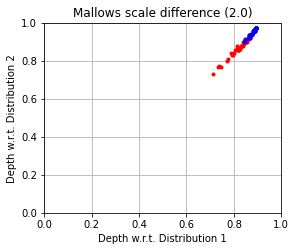

In [9]:
np.random.seed(1)
# Define data structures
n = 10
k = 100
diffs = np.array(list(range(11))) / 10 + 1
print(diffs)
pValues = np.ones((len(diffs), k))
for iDf in range(len(diffs)):
    print("Scale value equals " + str(diffs[iDf]))
    for iRep in range(k):
        print("Iteration " + str(iRep))
        # Generate the data
        empDist1, empDist2 = MallowsDiff2(n, 550, 50, diffs[iDf])
        # Plot the DD-plot
        print("Plotting DD-plot")
        depths1 = np.transpose(np.array([qrdepth(empDist1[:50,:], empDist1[:50,:]), qrdepth(empDist1[:50,:], empDist2)]))
        depths2 = np.transpose(np.array([qrdepth(empDist2, empDist1[:50,:]), qrdepth(empDist2, empDist2)]))
        plt.close("all")
        plt.figure(1, figsize=(4.25, 3.5))
        plt.title("Mallows scale difference (" + str(diffs[iDf]) + ")")
        plt.plot(depths1[:,0], depths1[:,1], 'r.')
        plt.plot(depths2[:,0], depths2[:,1], 'b.')
        plt.xlabel("Depth w.r.t. Distribution 1")
        plt.ylabel("Depth w.r.t. Distribution 2")
        plt.ylim(0, 1)
        plt.xlim(0, 1)
        plt.grid()
        plt.savefig("pic-ddtest-n10-Mallows2-" + str(diffs[iDf]) + ".pdf")
        print("Performing the test")
        # Calculate the depth statistics
        depthsTest1 = qrdepth(empDist1[:50,:], empDist1[50:,:])
        depthsTest2 = qrdepth(empDist2, empDist1[50:,:])
        depthsTestR = qrdepth(empDist1[50:,:], empDist1[50:,:])
        pDSmaller1 = np.zeros(50)
        for i in range(50):
            pDSmaller1[i] = np.mean(depthsTestR < depthsTest1[i])
        pDSmaller2 = np.zeros(50)
        for i in range(50):
            pDSmaller2[i] = np.mean(depthsTestR < depthsTest2[i])
        # Caculate the test statistics
        print("Calculating the p-value")
        nX = 50
        nY = 50
        W = np.sum(rankdata(np.concatenate((pDSmaller1, pDSmaller2)))[:50])
        print(W)
        Wmean = nY * (nX + nY + 1) / 2
        Wvar = nX * nY * (nX + nY + 1) / 12
        pr = norm.cdf(W, Wmean, np.sqrt(Wvar))
        pValues[iDf,iRep] = min(pr, 1 - pr)
        print(pValues[iDf,iRep])

In [10]:
np.savetxt("Results-testing-Mallows2.txt", pValues, delimiter = ",")
print(diffs)
print(np.mean(pValues, axis = 1))

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
[2.76808408e-01 1.66942175e-01 6.03069681e-02 1.70097845e-02
 3.37121820e-03 1.45933882e-04 1.04918298e-05 8.42174893e-06
 1.29760539e-06 1.73931085e-08 2.42173019e-08]


Plot the average p-values

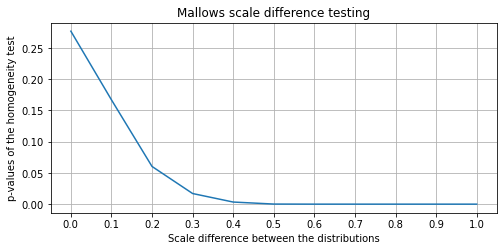

In [11]:
plt.close("all")
plt.figure(1, figsize=(8, 3.5))
plt.title("Mallows scale difference testing")
plt.plot(diffs - 1, np.mean(pValues, axis = 1), '-')
plt.xlabel("Scale difference between the distributions")
plt.ylabel("p-values of the homogeneity test")
plt.xticks(diffs - 1)
plt.grid()
plt.savefig("pic-ptest-n10-Mallows2.pdf")